# Random Digits Exercice

### Description:
This is an exercise in hypothesis testing, specifically determining if a series of digits [0,9] is random or not, and if the origin is human (i.e. yourself!). In order to determine this, one has to design and apply statistical tests, from which the degree of consistency of being random can be calculated.

### Your task:
Using tests of your choice/design, determine which of the given data sets are consistent with being random, and which aren't. One is based on the digits you entered in the course questionaire, while the others range from obviously non-random over poor/quasi random to digits of pi and truly random. See if you among these can determine your (human) dataset.

###  Author: 
 - Troels Petersen ([petersen@nbi.dk](mailto:petersen@nbi.dk))

###  Date:
 - 5th of December 2024

---

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats
import random as rand

## Import random numbers from text file:

In [118]:
# Define list of input files:
dataset_letter_a='A' # between A and D
infiles_a = ["data_RandomDigits2024_" + dataset_letter_a + ".txt" ]
dataset_letter_b='B' # between A and D
infiles_b = ["data_RandomDigits2024_" + dataset_letter_b + ".txt" ]
dataset_letter_c='C' # between A and D
infiles_c = ["data_RandomDigits2024_" + dataset_letter_c + ".txt" ]
dataset_letter_d='D' # between A and D
infiles_d = ["data_RandomDigits2024_" + dataset_letter_d + ".txt" ]

In [119]:
# List containing all numbers:
numbers_a = []
numbers_b = []
numbers_c = []
numbers_d = []

# Loop over input files open them in read mode
for ifile in infiles_a: 
    with open( ifile, "r" ) as current_file : 
        # Extract current file info : Loop through each line in the file, loop through each character
        # in the line, demand character is not empty ("") and convert the result to an integer
        # Finally add result to the numbers list
        numbers_a += [int(char) for line in current_file for char in line.strip() if char != ""]
for ifile in infiles_b : 
    with open( ifile, "r" ) as current_file :
        numbers_b += [int(char) for line in current_file for char in line.strip() if char != ""]
for ifile in infiles_c : 
    with open( ifile, "r" ) as current_file :
        numbers_c += [int(char) for line in current_file for char in line.strip() if char != ""]
for ifile in infiles_d : 
    with open( ifile, "r" ) as current_file :
        numbers_d += [int(char) for line in current_file for char in line.strip() if char != ""]

In [120]:
# Always take a look at the data:
numbers_a, numbers_b, numbers_c, numbers_d = np.array(numbers_a), np.array(numbers_b), np.array(numbers_c), np.array(numbers_d)
print(numbers_a, len(numbers_a))

[2 9 6 ... 7 4 1] 3369


## Define your tests:

Here is an example plot from the data, just for convenience. It is all up to you from here...

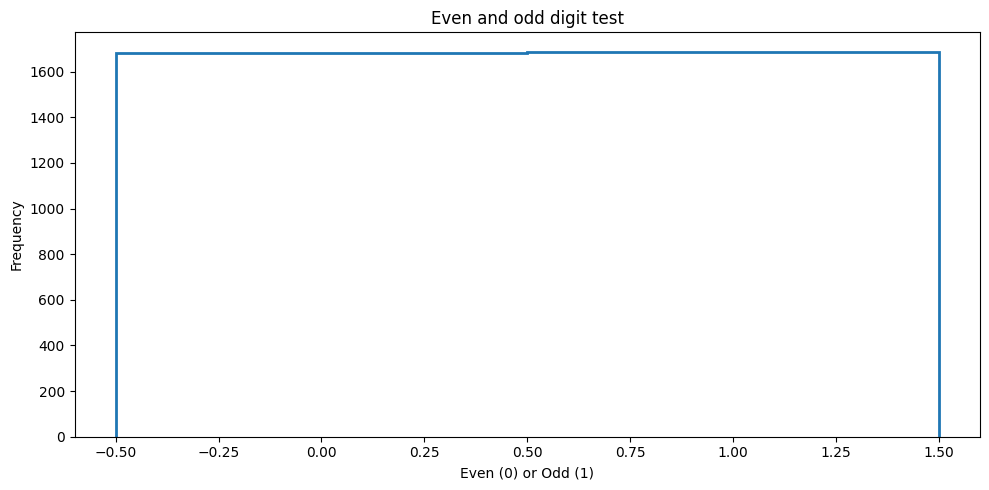

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax.hist(numbers_a%2, bins=2, range=(-0.5, 1.5), histtype='step', density=False, lw=2)         
ax.set(xlabel="Even (0) or Odd (1)", ylabel="Frequency", title="Even and odd digit test")
fig.tight_layout()

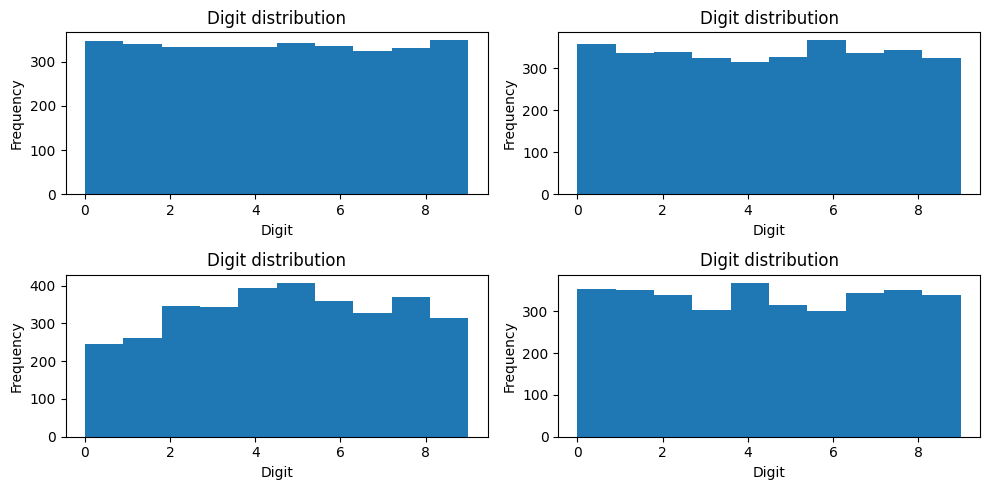

In [122]:
#Look at how many of each digit there is

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

ax[0,0].hist(numbers_a, label='A')
ax[0,0].set(xlabel="Digit", ylabel="Frequency", title="Digit distribution")
ax[0,1].hist(numbers_b, label='B')
ax[0,1].set(xlabel="Digit", ylabel="Frequency", title="Digit distribution")
ax[1,0].hist(numbers_c, label='C')
ax[1,0].set(xlabel="Digit", ylabel="Frequency", title="Digit distribution")
ax[1,1].hist(numbers_d, label='D')
ax[1,1].set(xlabel="Digit", ylabel="Frequency", title="Digit distribution")
fig.tight_layout()
plt.show()


In [ ]:
#doing chi2 test
chi2_a = 0

for i, numbers_a in enumerate([numbers_a, numbers_b, numbers_c, numbers_d]):
    chi2_a += [stats.chisquare(len(numbers_a[numbers_a==[integer for integer in range(10)]], ), f_exp=[len(numbers_a)/2, len(numbers_a)/2])]
    


ValueError: operands could not be broadcast together with shapes (3369,) (10,) 

In [142]:
#Look at how many repeated digits there are
numbers_a_pairs_matrix = np.zeros((10,10))
numbers_b_pairs_matrix = np.zeros((10,10))
numbers_c_pairs_matrix = np.zeros((10,10))
numbers_d_pairs_matrix = np.zeros((10,10))



for i in range(len(numbers_a)-1):
    numbers_a_pairs_matrix[numbers_a[i], numbers_a[i+1]] += 1
    numbers_b_pairs_matrix[numbers_b[i], numbers_b[i+1]] += 1
    numbers_c_pairs_matrix[numbers_c[i], numbers_c[i+1]] += 1
    numbers_d_pairs_matrix[numbers_d[i], numbers_d[i+1]] += 1

##for i in range(len(numbers_a)):
#    if i<len(numbers_a)-1:    
 #       numbers_b_pairs[i] = (numbers_b[i], numbers_b[i+1])
 #       numbers_c_pairs[i] = (numbers_c[i], numbers_c[i+1])
 #       numbers_d_pairs[i] = (numbers_d[i], numbers_d[i+1])


(numbers_a_pairs_matrix)

array([[  7.,   7.,   2.,   5.,   4.,   4.,   2., 307.,   3.,   5.],
       [  4.,   5.,   3.,   2.,   1.,   8.,   1.,   2., 307.,   5.],
       [  4.,   3.,   1.,   4.,   5.,   2.,   3.,   3.,   1., 307.],
       [311.,   3.,   2.,   1.,   4.,   2.,   3.,   0.,   1.,   6.],
       [  3., 308.,   3.,   3.,   0.,   2.,   4.,   4.,   3.,   4.],
       [  7.,   1., 308.,   3.,   3.,   5.,   3.,   1.,   4.,   7.],
       [  2.,   3.,   2., 307.,   3.,   4.,   1.,   3.,   8.,   3.],
       [  1.,   2.,   5.,   0., 308.,   1.,   2.,   3.,   1.,   2.],
       [  2.,   3.,   3.,   5.,   4., 309.,   3.,   0.,   0.,   3.],
       [  5.,   4.,   3.,   3.,   2.,   5., 314.,   2.,   4.,   7.]])

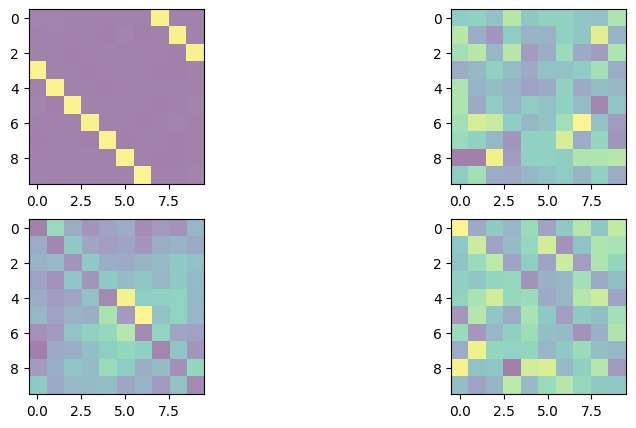

In [143]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

ax[0,0].imshow(numbers_a_pairs_matrix, cmap='viridis', alpha=0.5)
ax[0,1].imshow(numbers_b_pairs_matrix, cmap='viridis', alpha=0.5)
ax[1,0].imshow(numbers_c_pairs_matrix, cmap='viridis', alpha=0.5)
ax[1,1].imshow(numbers_d_pairs_matrix, cmap='viridis', alpha=0.5)

### Comments on even/odd histogram:

What would you expect this distribution to be? Think about it, and then ask, if the distribution observed in data truly follows your expectation. Afterwards, think about the many other tests, that you can perform.

### Note on general goal of hypothesis tests:
Given the outcome of some test, you should try to convert it to a probability or number of sigmas (same thing). Thus determine what you expect, and then see what you observe and what uncertainty your observation has... and determine if this is consistent with the (null) hypothesis, that the data is truly random digits.

Questions:
---
 1. Discuss with your peers, what criteria truly random numbers should satisfy, and how these criteria can be tested.
    Based on this and on the discussion in class, write up such tests, and run all the datasets through your tests to
    see if some do not seem to be truly random.

 2. One dataset is truly random. Apart from your own data, the other data sets are the result of using random numbers,
    but applying operations to these, such that these (non-human) data sets are not perfectly random, but supposedly
    more regular (in some sense) than the humanly generated one. See if you can determine which one is "your" (humanly
    generated) data.

 3. Once you have found "your own" dataset, try to see if you from your testing can determine, why the two other
    non-random datasets are not random. Can you figure out why?

# Learning points:

This exercise should generally make you capable of:
1. Designing (simple) hypothesis tests
2. Coding them up
3. Applying them to data
4. Interpreting the results

You should be highly aware, that a fully correct test may not "discover" anything, even if there is an effect. For example, testing if two samples are alike, and checking if the means are consistent is a test. And they may be consistent, even if the two samples are _very_ different.

However, if just **one** test shows a significant deviation from a hypothesis, then this hypothesis fails.